# Solving Van der Pol oscillator with `SciPy`

In [1]:
from scipy.integrate import solve_ivp
import numpy as np

In [2]:
import matplotlib.pyplot as plt

## Van der Pol oscillator:
https://en.wikipedia.org/wiki/Van_der_Pol_oscillator
$$\frac{d^2x}{dt^2}-\mu(1-x^2)\frac{dx}{dt}+x=0$$

## refactoring
The formula of Van der Pol oscillator is a second order differential equation, which is not convenient as the input of the ode solver from `scipy`. We need to refactor it into two first order differntial equations by introducing an auxilliary variable $z$.

$$z = \frac{dx}{dt}$$

$$\frac{dz}{dt} - \mu (1 - x^2) z + x = 0$$

Then we can use this system of two odes as the input of the ode solver. The system is represented by a function that take $[z, x]$ at time $t$ as input and returns an array of $[\frac{dz}{dt}, \frac{dx}{dt}]$, aka $[\frac{dz}{dt}, z]$, which is the differential at time $t$. 

In [3]:
def vdp(t, y, mu):
    z = y[0]
    x = y[1]
    dzdt = mu * (1-x**2) * z - x
    
    return [dzdt, z]

In [4]:
tspan = [0, 10]
y0 = [7, 5]
mu = 0.1
sol = solve_ivp(lambda t,y: vdp(t, y, mu), tspan, y0)

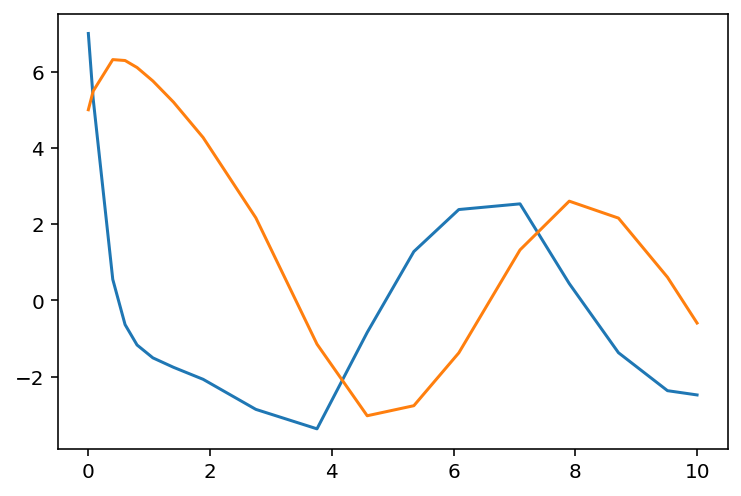

In [5]:
plt.plot(sol.t, sol.y[0,:], sol.t, sol.y[1,:])

In [6]:
sol.y[:,-1]

array([-2.47815616, -0.592468  ])

In [7]:
sol.y

array([[ 7.        ,  5.2828547 ,  0.55167623, -0.63453947, -1.16862719,
        -1.50598281, -1.75315669, -2.06784747, -2.85663864, -3.36694712,
        -0.83874439,  1.28148813,  2.3835248 ,  2.53255322,  0.44268801,
        -1.37067077, -2.36640816, -2.47815616],
       [ 5.        ,  5.48930674,  6.31527706,  6.29122902,  6.10742245,
         5.75458447,  5.20122004,  4.27288486,  2.16576625, -1.14596129,
        -3.02408539, -2.76028996, -1.37500049,  1.32504894,  2.60327113,
         2.15879827,  0.60802936, -0.592468  ]])